In [2]:
#Imports for data analysis, data wrangling and visualization
import pandas as pd
import numpy as np
import random as rand
import seaborn as sns
import matplotlib.pyplot as plt
#Machine learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron, SGDClassifier


In [3]:
#Loading the data
train_df = pd.read_csv('D:\\Academic\\sem 6\\ML\\Lab\\lab 5\\train.csv')
test_df = pd.read_csv('D:\\Academic\\sem 6\\ML\\Lab\\lab 5\\test.csv')
combine = [train_df,test_df]

In [4]:
#Checking the column names
print(train_df.columns.values)
#Categorical variables - Survived, Sex, Embarked, Pclass
#Numerical variables - Age, Fare, SibSP, Parch
#Ticket is a mix of numeric and alphanumeric data types and Cabin is Alphanumeric

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
#Checking the training DF
train_df.tail(15)
#Cabin and Age contain null values


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [6]:
#Checking the test DF
test_df.tail(15)
#Cabin and Age contain null values


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
406,1298,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [7]:
#Checking the data types of the features (7 features are integers or floats (6 in 
train_df.info()
print('-'*40)
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
#Checking the numerical distribution of numerical features across the samples
train_df.describe()
#891 samples of 2224 that were aboard
#Around 38% survived, compared to 32% of the actual rate

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(include=['O'])
# Names are unique
# 65% are male (577/891)
# A lot of the cabins are shared (147 cabins), also duplicate values
# 3 possible embarked values, S is the most popular (644/889)
# Ticket feature has a high ratio of duplicate values (681/891)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
#To confirm some of our assumptions we can analyze feature correlation by pivoting
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values

<bound method DataFrame.sort_values of    Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363>

In [11]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values

<bound method DataFrame.sort_values of       Sex  Survived
0  female  0.742038
1    male  0.188908>

In [12]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values

<bound method DataFrame.sort_values of    SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000>

In [13]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values

<bound method DataFrame.sort_values of    Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000>

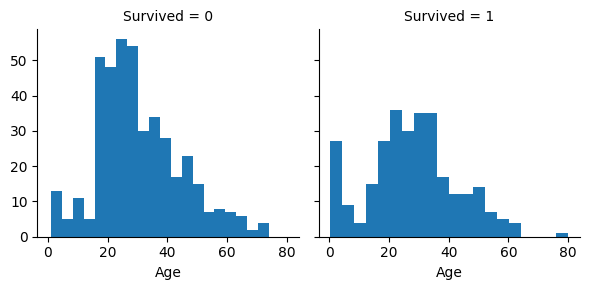

In [14]:
graph = sns.FacetGrid(train_df,col = 'Survived')
graph.map(plt.hist, 'Age', bins = 20)


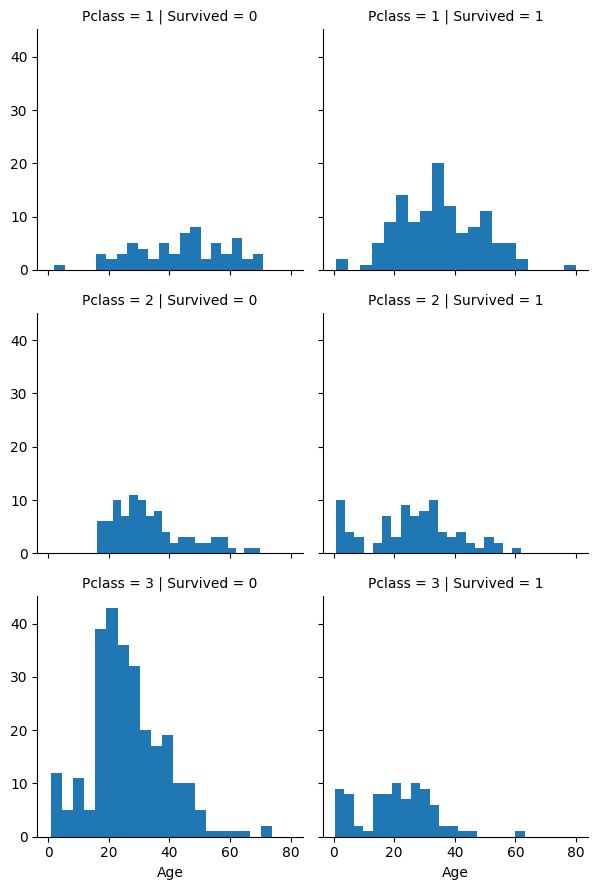

In [15]:
graph = sns.FacetGrid(train_df, col = 'Survived',row='Pclass')
graph.map(plt.hist, 'Age', bins = 20)
graph.add_legend()


c:\Users\samya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\samya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


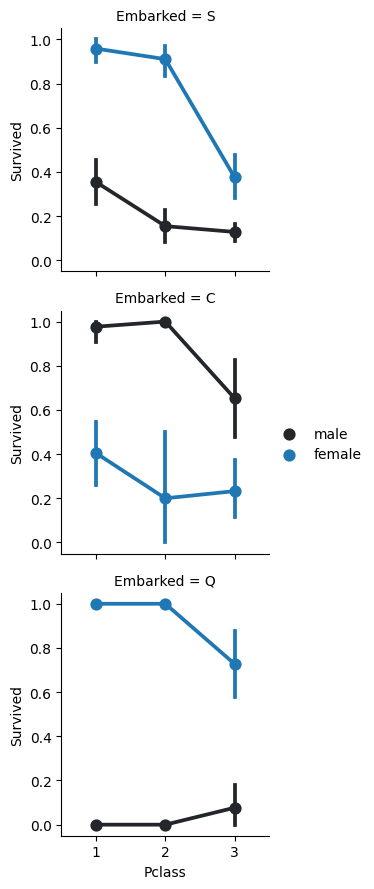

In [16]:
graph = sns.FacetGrid(train_df, row = 'Embarked')
graph.map(sns.pointplot, 'Pclass','Survived','Sex')
graph.add_legend()


c:\Users\samya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\samya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\samya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\samya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\samya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:84

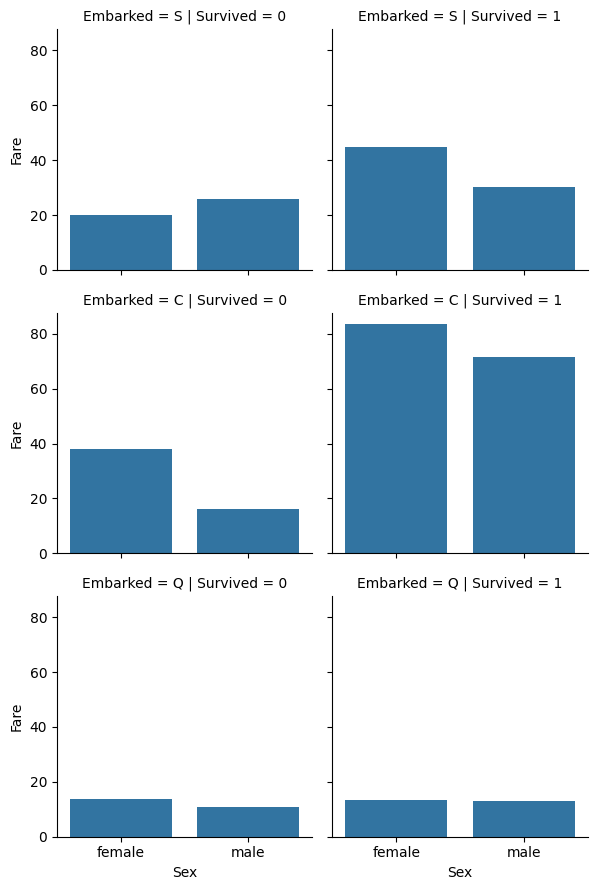

In [17]:
graph = sns.FacetGrid(train_df, col = 'Survived',row='Embarked')
graph.map(sns.barplot, 'Sex','Fare', ci = None)
graph.add_legend()


In [18]:
#dropping unnecessary features to speed up the training
IDs = test_df['PassengerId']
train_df.drop(['Ticket','Cabin','PassengerId'], inplace=True, axis = 1)
test_df.drop(['Ticket','Cabin','PassengerId'], inplace=True, axis = 1)
combine = [train_df,test_df]


In [19]:
#creating new feature from existing - 'name' - extracting the characters of the s
for dataset in combine:
 dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)
pd.crosstab(train_df['Title'], train_df['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
#we can group the uncommon titles on a category named other
for dataset in combine:
 dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
 dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
 dataset['Title'] = dataset['Title'].replace('Ms','Miss')
 dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
train_df.groupby('Title').mean()

C:\Users\samya\AppData\Local\Temp\ipykernel_14836\555602252.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df.groupby('Title').mean()


,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,
Master,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,0.702703,2.291892,21.845638,0.702703,0.540541,43.800092
Mr,0.156673,2.410058,32.368090,0.288201,0.152805,24.441560
Mrs,0.793651,1.992063,35.788991,0.690476,0.825397,45.330290
Other,0.347826,1.347826,45.545455,0.347826,0.086957,37.169748


In [21]:
#Then we can convert the categorical titles to ordinal
title_dict = {'Mr': 1,
 'Miss': 2,
 'Mrs': 3,
 'Master': 4,
 'Other': 5 }
for dataset in combine:
 dataset['Title'] = dataset['Title'].map(title_dict) 
 dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [22]:
#now we can also drop the name feature
train_df.drop(['Name'], axis = 1 , inplace = True)
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [23]:
#converting the categorical feature (sex) into ordinal
for dataset in combine:
 dataset['Sex'] = dataset['Sex'].map({'female':1,
 'male':0})
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


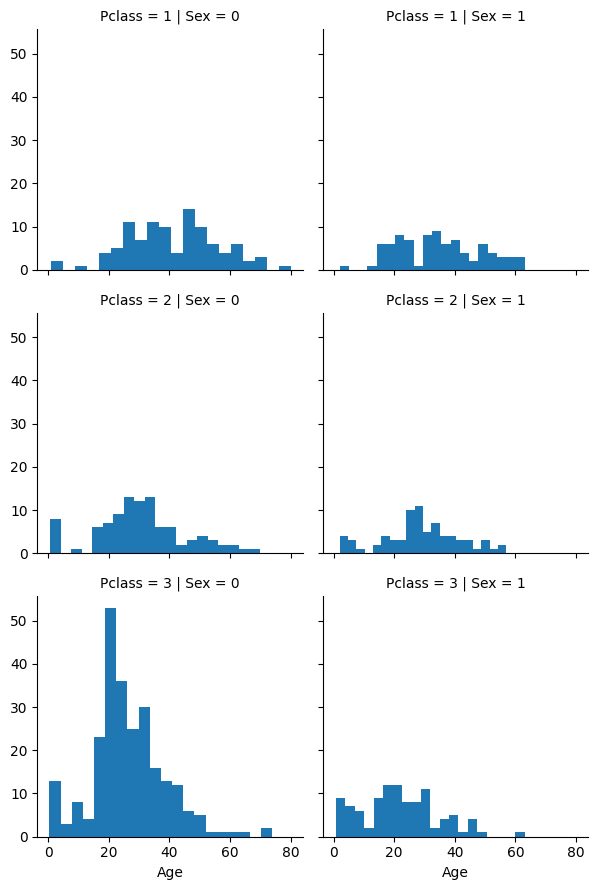

In [24]:
#now we should estimate or complete the feature with missing or null values, we'l
#we will guess the missing values for age by using other correlated features like 
graph = sns.FacetGrid(train_df, row = 'Pclass', col = 'Sex')
graph.map(plt.hist, 'Age', bins = 20)
graph.add_legend()


In [25]:
#Lets prepare an empty array to contain the guessed age values for all the 6 pclas
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [26]:
#Now we iterate to get the median of each combination of pclass and sex, and use 
for dataset in combine:
    for i in range (0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & \
            (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess/.5 +.5)*.5 #convert random age float to
    for i in range (0,2):
        for j in range (0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Parch==j)]
            dataset['Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,21,1,0,7.2500,S,1
1,1,1,1,21,1,0,71.2833,C,3
2,1,3,1,21,0,0,7.9250,S,2
3,1,1,1,21,1,0,53.1000,S,3
4,0,3,0,21,0,0,8.0500,S,1


In [27]:
#Checking to see how the ages split in 5 different bands (in absolut numbers not a
train_df['AgeBand'] = pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index = False).mean().sort_index

<bound method DataFrame.sort_index of             AgeBand  Survived
0  (20.979, 20.987]       NaN
1  (20.987, 20.996]       NaN
2  (20.996, 21.004]  0.383838
3  (21.004, 21.013]       NaN
4  (21.013, 21.021]       NaN>

In [28]:
#Attributing a number to each of the agebands
for dataset in combine:
 dataset.loc[dataset['Age'] <= 16,'Age'] = 0
 dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32),'Age'] = 1
 dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48),'Age'] = 2
 dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64),'Age'] = 3
 dataset.loc[dataset['Age'] > 64,'Age'] = 4
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(20.996, 21.004]"
1,1,1,1,1,1,0,71.2833,C,3,"(20.996, 21.004]"
2,1,3,1,1,0,0,7.9250,S,2,"(20.996, 21.004]"
3,1,1,1,1,1,0,53.1000,S,3,"(20.996, 21.004]"
4,0,3,0,1,0,0,8.0500,S,1,"(20.996, 21.004]"


In [29]:
train_df.drop(columns='AgeBand', inplace =True, axis = 1)
combine = [train_df,test_df]
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,1,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,1,1,0,53.1000,S,3
4,0,3,0,1,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5
887,1,1,1,1,0,0,30.0000,S,2
888,0,3,1,1,1,2,23.4500,S,2
889,1,1,0,1,0,0,30.0000,C,1


In [30]:
#Here we are aggregating the number of partners (parch) with simblings (SibSp) and
for dataset in combine:
 dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1
 dataset.drop(columns=['SibSp','Parch'],inplace=True,axis=1) 
train_df[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by=['Survived'])

,FamilySize,Survived
7,8,0.000000
8,11,0.000000
5,6,0.136364
4,5,0.200000
0,1,0.303538
6,7,0.333333
1,2,0.552795
2,3,0.578431
3,4,0.724138


In [31]:
#Creating a feature 'isAlone' will help us to correlate the fact of being alone w
for dataset in combine:
 dataset['isAlone'] = 0
 dataset.loc[dataset['FamilySize'] == 1, 'isAlone'] = 1
 dataset.drop('FamilySize',inplace=True,axis=1) #we can also drop family size a
train_df[['isAlone','Survived']].groupby(['isAlone']).mean().sort_values(by=['Survived'])

,Survived
isAlone,
1,0.303538
0,0.505650


In [32]:
#We can create a new feature multiplying age and the pclass, so in theory the lowe
for dataset in combine:
 dataset['AgeClass'] = dataset['Age'] * dataset['Pclass']
train_df[['Age','Pclass','AgeClass']].head(10)

,Age,Pclass,AgeClass
0,1,3,3
1,1,1,1
2,1,3,3
3,1,1,1
4,1,3,3
5,1,3,3
6,1,1,1
7,1,3,3
8,1,3,3
9,1,2,2


In [33]:
#Checking the embarked feature we can see that S is the most common port, so we'l
train_df.Embarked.describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [34]:
freq_port = 'S'
for dataset in combine:
 dataset['Embarked'].fillna(freq_port,inplace=True)
train_df[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by=['Survived'])
#Its possible to see that the S port had the lower mean survival rate and C had th

,Survived
Embarked,
S,0.339009
Q,0.389610
C,0.553571


In [35]:
#Mapping the ports
for dataset in combine:
 dataset['Embarked'] = dataset['Embarked'].map({'S':0,
 'C':1,
 'Q':2}).astype(int)
train_df.head(10)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,AgeClass
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,1,71.2833,1,3,0,1
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,1,53.1000,0,3,0,1
4,0,3,0,1,8.0500,0,1,1,3
5,0,3,0,1,8.4583,2,1,1,3
6,0,1,0,1,51.8625,0,1,1,1
7,0,3,0,1,21.0750,0,4,0,3
8,1,3,1,1,11.1333,0,3,0,3
9,1,2,1,1,30.0708,1,3,0,2


In [36]:
#Complete fare for the single missing value on the test DF using the mode
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df

,Pclass,Name,Sex,Age,Fare,Embarked,Title,isAlone,AgeClass
0,3,"Kelly, Mr. James",0,1,7.8292,2,1,1,3
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,1,7.0000,0,3,0,3
2,2,"Myles, Mr. Thomas Francis",0,1,9.6875,2,1,1,2
3,3,"Wirz, Mr. Albert",0,1,8.6625,0,1,1,3
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,12.2875,0,3,0,3
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",0,1,8.0500,0,1,1,3
414,1,"Oliva y Ocana, Dona. Fermina",1,1,108.9000,1,5,1,1
415,3,"Saether, Mr. Simon Sivertsen",0,1,7.2500,0,1,1,3
416,3,"Ware, Mr. Frederick",0,1,8.0500,0,1,1,3


In [37]:
#We can now create the bands for the fare, but as we did for the age we have to ch
train_df['FareBand'] = pd.qcut(train_df['Fare'],4) #qcut divides into 4 quantiles 
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by=['Survived'])
#We can see that the higher the band the higher the survival mean rate


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [38]:
for dataset in combine:
 dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
 dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
 dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
 dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
 dataset['Fare'] = dataset['Fare'].astype(int)
train_df.drop(['FareBand'], axis=1, inplace=True)
combine = [train_df, test_df]
 
train_df


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,AgeClass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,1,3,1,3,0,1
2,1,3,1,1,1,0,2,1,3
3,1,1,1,1,3,0,3,0,1
4,0,3,0,1,1,0,1,1,3
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,5,1,2
887,1,1,1,1,2,0,2,1,1
888,0,3,1,1,2,0,2,0,3
889,1,1,0,1,2,1,1,1,1


In [39]:
#And now both our datasets are ready
test_df.drop(columns=['Name'],inplace=True,axis=1)
test_df.head(100)

,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,AgeClass
0,3,0,1,0,2,1,1,3
1,3,1,1,0,0,3,0,3
2,2,0,1,1,2,1,1,2
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3
...,...,...,...,...,...,...,...,...
95,3,0,1,0,0,1,1,3
96,1,1,1,3,0,3,0,1
97,3,0,1,1,0,1,1,3
98,3,1,1,0,0,2,1,3


In [40]:
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df['Survived']
X_test = test_df.copy()
X_train.shape,Y_train.shape,X_test.shape


((891, 8), (891,), (418, 8))

In [41]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train) * 100,2)
print(acc_log,'%')

78.9 %


In [42]:
coeff = pd.DataFrame(train_df.columns.delete(0))
coeff.columns = ['Feature']
coeff['Correlation'] = pd.Series(logreg.coef_[0])
coeff.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
1,Sex,2.179225
5,Title,0.408812
4,Embarked,0.301664
6,isAlone,0.022209
2,Age,0.000450
3,Fare,-0.048796
0,Pclass,-0.486877
7,AgeClass,-0.486877


In [43]:
coeff = pd.DataFrame(train_df.columns.delete(0))
coeff.columns = ['Feature']
coeff['Correlation'] = pd.Series(logreg.coef_[0])
coeff.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
1,Sex,2.179225
5,Title,0.408812
4,Embarked,0.301664
6,isAlone,0.022209
2,Age,0.000450
3,Fare,-0.048796
0,Pclass,-0.486877
7,AgeClass,-0.486877


In [44]:
#Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train,Y_train)*100,2)
print(acc_sgd,'%')


73.96 %


In [45]:
models = pd.DataFrame({'Model':
['SGD','Logistic Regression'],
'Scores':
[acc_sgd,acc_log]}
)
models = models.sort_values(by='Scores',ascending=False).reset_index(drop=True)
models


,Model,Scores
0,Logistic Regression,78.90
1,SGD,73.96
